In [1]:
import iatv

In [2]:
items = iatv.search_items(
    'EPA AND strangle',
    time='201701', 
    rows=1000
)

shows = [item for item in items if 'commercial' not in item]

print(len(shows))
print(len(items))

15
15


In [3]:
s0 = shows[0]
s0.keys()

dict_keys(['identifier', 'title', 'downloads', 'collection', 'creator', 'snip', 'start', 'thumb', '__img__', '__imght__', '__href__', 'topic', 'video'])

In [4]:
print(s0['video'])
print()

https://archive.org/download/FBC_20170104_010000_Kennedy/FBC_20170104_010000_Kennedy.mp4?t=83/143&ignore=x.mp4



In [5]:
from collections import Counter
ids = [s['identifier'] for s in shows]
# Checking that there are no repeats. 
np.max(list(Counter(ids).values()))

1

In [6]:
# There are, however, reruns.
[s['identifier'] for s in shows[:5]]

['FBC_20170104_010000_Kennedy',
 'MSNBCW_20170118_160000_MSNBC_Live_With_Tamron_Hall',
 'KPIX_20170126_010000_KPIX_5_News_at_5PM',
 'CSPAN_20170125_203200_SBA_Administrator_Linda_McMahon_Testifies_at_Confirmation_Hearing',
 'CSPAN3_20170125_154700_SBA_Administrator_Linda_McMahon_Testifies_at_Confirmation_Hearing']

In [7]:
s0 = iatv.Show(shows[0]['identifier'])

In [14]:
shows[5]['snip']

" risen to the top. in my state and in our <b>dealings</b> <b>the</b> <em>epa</em> <b>is</b> <b>way</b> up there. and after that there's others that come in behind. but if you ask any businessman today, be it a small business map or a big business man but particularly small business, what's the biggest challenge you face today. and they will invariably not say it's access to capital or taxes are too high or whatever. they will tell you the regulatory structure of america today is strangling businesses. and you'll find that -- everybody at this table can tell stories about government agencies coming into small businesses and causing them a great deal of difficulty. we have an operation within the sba called the operation of advoerks. they're supposed to be independent. they haven't been. they're supposed to stand up and complain loudly every time the federal government does something 245 affects small businesses. there is a process in place for them to actually formally do this. it has 

## Current search results and data

There is only one identifier per set of search results. This is maybe a problem. This means that only the first instance of a match is reported in the search results. I have a feeling that $\Pr(> 1~\mathrm{matches} | 1~\mathrm{match})$ is rather high; if there is one instance of MV there is a high probability of there being more than one. 

For now I will ignore this problem, and assume that the probability of more than one is zero. This is surely not correct, but we will get some information on who is using metaphorical violence most often, and when. I will do a full prototype run with just the first search result found. Then I will go through all potential instances and download the transcripts, and search the transcripts manually for more instances of the metaphorical violence of interest.

The following cells perform the search and insert into Project from search results.

In [ ]:
# items = iatv.search_items(
#     'EPA AND strangle',
#     time='20160101-20170630', 
#     rows=1000
# )

# shows = [item for item in items if 'commercial' not in item]

# print('Number of items:', len(items))
# print('Number of shows:', len(shows))

# ids = [s['identifier'] for s in shows]
# # Checking that there are no repeats.
# np.max(list(Counter(ids).values()))

In [24]:
import sys
import os

# Web app & data model config file, used on next import.
os.environ['CONFIG_FILE'] = 'conf/default.cfg'

from metacorps.app.models import Project

In [25]:
def remove_commercials(item_list):
    return [item for item in item_list if 'commercial' not in item]

In [52]:

time_rng = '20160101-20171231'
base_query = '(epa OR e.p.a. OR "environmental protection agency" OR regulat*) AND '
queries = {
    'kill*': base_query + 'kill*',
    'strangl*': base_query + 'strangl*'
}
print(queries)

{'kill*': '(epa OR e.p.a. OR "environmental protection agency" OR regulat*) AND kill*', 'strangl*': '(epa OR e.p.a. OR "environmental protection agency" OR regulat*) AND strangl*'}


In [55]:
search_results = {
    k: iatv.search_items(query, time=time_rng, rows=1000)
    for k, query in queries.items()
}

In [56]:
print(len(search_results['kill*']))
print(len(search_results['strangl*']))

715
684


In [57]:
search_results = {
    k: iatv.search_items(query, time=time_rng, rows=2000)
    for k, query in queries.items()
}

In [58]:
print(len(search_results['kill*']))
print(len(search_results['strangl*']))

1499
684


In [59]:
kill_res = iatv.search_items(queries['kill*'], time=time_rng, rows=3000)

In [60]:
print(len(kill_res))

2277


In [61]:
kill_res = iatv.search_items(queries['kill*'], time=time_rng, rows=4000)
print(len(kill_res))

3053


In [62]:
kill_res = iatv.search_items(queries['kill*'], time=time_rng, rows=6000)
print(len(kill_res))

4746


I don't know what's going on here, but there are too many matches. I believe this searches over the entire show, and there is no preference given to the AND search terms occurring near each other. So, there are a lot of shows apparently that have some form of "kill" in them and epa or regulat\*. Strangle is the more interesting one to me, as it's very vivid to me, and I want eventually to see how this one versus some others affect people. 

So, I'm going with just the strangle results.

In [63]:
# double check no commercials
strangle = remove_commercials(search_results['strangl*'])

In [65]:
len(strangle)

684

Apparently there are no commercials in the search results. Another benefit of using TVNA search directly. So many matches were for commercials, and commercial format changed (upper vs. lower case) between 2012 and 2016, and there was no other simple way I could think of to remove commercials. 

In [70]:
proj = Project.from_search_results({'epa-reg-strangle': strangle}, project_name='EPA Metvi')

In [71]:
proj.save()

<Project: Project object>

To see the newly-saved project, `cd metacorps` then run

```bash
export CONFIG_FILE=conf/default.cfg
export FLASK_APP=app/app.py
export FLASK_ENV=development
flask run --with-threads
```

then visit http://127.0.0.1:5000/

## Notes on coding

* Using this format for politicians ({R/D}-{State}; {District or other descriptor if applicable})
* Putting xN if there are N instances of metaphorical violence. Multiple subjects and objects will be noted, as well as multiple speakers comma-separated.
* Double counting same speech on different channels.
* Ignoring Obamacare strangling businesses, but including Dodd-Frank. Exception: "Obamacare regulation".

# Analysis

In [72]:
from metacorps.app.models import Project

In [76]:
epa = Project.objects(name='EPA Metvi')[0]

In [77]:
epa.name

'EPA Metvi'

In [87]:
f0 = epa.facets[0]
print(len(f0.instances))
print(len([inst for inst in f0.instances if inst.include]))

684
169


In [91]:
includes = [inst for inst in f0.instances if inst.include]
speakers = [inst.spoken_by for inst in includes]

In [99]:
from collections import Counter



c = Counter(speakers)
del c['contributor']
del c['']
del c['host']
del c['Panelist']
c.most_common(10)

[('Maria Bartiromo', 16),
 ('Donald Trump', 9),
 ('John Cornyn (R-Texas; Senate)', 5),
 ('Paul Ryan', 4),
 ('Kellyanne Conway', 4),
 ('Dan Sullivan (R-Alaska; Senate)', 3),
 ('Liz Cheney (R-Wyoming; At Large)', 2),
 ('Mike Huckabee', 2),
 ('Rick Perry', 2),
 ('Paul Ryan (R-Wisconsin; 1st District)', 2)]

In [98]:
i0 = includes[0]

i0.to_mongo()

SON([('text', "<b></b> <em>environmental</em> <em>protection</em> <em>agency</em> <b>was</b> <b>responsible</b> for the blowout of the gold king mine in colorado that spilled three million gallons of wastewater, impacting new mexico, colorado, utah, arizona and the navajo nation. i was in farmington, new mexico, when the toxic plume turned the river there yellow. i met with the community and heard their concerns about the toll that the spill was taking on businesses, farmers, families, individuals. madam chair, we are almost one year removed from the spill and in communities that have been impacted, there remains serious concerns about the long-term effects that the spill will have on the river and all that its water sustains from drinking water to farming and livestock. monitoring is essential to ensure that they have the data they need to protect the health on all those who rely on this water. unfortunately, the state of new mexico and the e.p.a. have been unable to agree on what the

In [102]:
i0.source_id

ObjectId('5bfee443e0484311f105894e')

In [106]:
from metacorps.projects.common.export_project import ProjectExporter

df = ProjectExporter('EPA Metvi').export_dataframe()

In [235]:
print(len(df))
df.head()

169


,start_localtime,start_time,stop_time,runtime_seconds,network,program_name,iatv_id,facet_word,conceptual_metaphor,spoken_by,subjects,objects,active_passive,text,tense,repeat,repeat_index
0,2016-07-12 23:00:00,None,None,None,CSPAN,US House of Representatives Special Orders,CSPAN_20160712_230000_US_House_of_Representati...,epa-reg-strangle,,Evan Jenkins (R-West Virginia; 3rd District),methane regulations,domestic energy portfolio,,<b></b> <em>environmental</em> <em>protection<...,,False,None
1,2016-09-21 20:00:00,None,None,None,CSPAN,U.S. House of Representatives Legislative Busi...,CSPAN_20160921_200000_U.S._House_of_Representa...,epa-reg-strangle,,"Bob Goodlatte (R-Virginia), Tom Marino (R-Penn...","washington regulators, ozone standards","economic recovery, economic opportunities",,<b>michigan</b> <b>v.</b> <em>e.p.a</em>. <b>...,,False,None
2,2017-02-02 15:59:00,None,None,None,CSPAN2,U.S. Senate Advances HHS Secretary Nomination,CSPAN2_20170202_155900_U.S._Senate_Advances_HH...,epa-reg-strangle,,John Cornyn (R-Texas; Senate),"extreme buffer rule, regulatory overreach","growth of our economy, jobs",,"in <b>mind,</b> <b>the</b> <em>environmental<...",,False,None
3,2017-01-05 18:59:00,None,None,None,CSPAN,U.S. House Legislative Business,CSPAN_20170105_185900_U.S._House_Legislative_B...,epa-reg-strangle,,Tom Marino (R-Pennsylvania; 10th District),"regulation, federal regulations, Obama's regul...","economy, economy, job creation",,. the gentleman from virginia is recognized. m...,,False,None
4,2017-03-01 21:00:00,None,None,None,CSPAN,U.S. House Meets for Legislative Business,CSPAN_20170301_210000_U.S._House_Meets_for_Leg...,epa-reg-strangle,,David Young (R-Iowa; 3rd District),red tape,economy and jobs engine,,<b>red</b> <b>tape</b> <em>strangling</em> <b...,,False,None


(array([ 6.,  7.,  3., 10., 13.,  6., 15., 13., 18., 11., 11., 20.,  4.,
         6., 10.,  7.,  2.,  1.,  2.,  4.]),
 array([735969.95833333, 736005.45208333, 736040.94583333, 736076.43958333,
        736111.93333333, 736147.42708333, 736182.92083333, 736218.41458333,
        736253.90833333, 736289.40208333, 736324.89583333, 736360.38958333,
        736395.88333333, 736431.37708333, 736466.87083333, 736502.36458333,
        736537.85833333, 736573.35208333, 736608.84583333, 736644.33958333,
        736679.83333333]),
 <a list of 20 Patch objects>)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


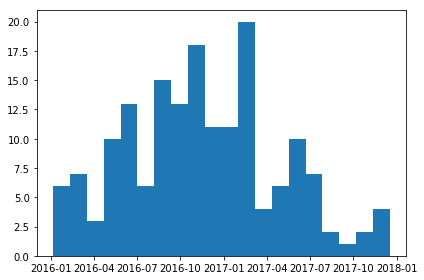

In [112]:
plt.hist(df.start_localtime, bins=20)

[1 1 1 1 2 1 1 1 3 2 1 1 1 1 8 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 4 1 1 1 2 1 1 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 2 4 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


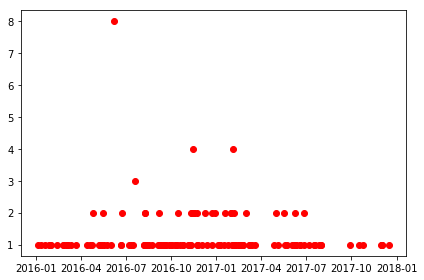

In [123]:
import pandas as pd
import numpy as np

c = Counter(df.start_localtime.dt.date)

print(np.array(list(c.values())))

s = pd.Series(index=c.keys(), data=list(c.values()))

s.plot(style='ro')

In [126]:
# Start on a Monday for weekly sums.
s.index.sort_values()

Index([2016-01-06, 2016-01-11, 2016-01-20, 2016-01-28, 2016-01-31, 2016-02-01,
       2016-02-14, 2016-02-26, 2016-02-27, 2016-03-04,
       ...
       2017-07-27, 2017-07-31, 2017-08-01, 2017-09-28, 2017-10-17, 2017-10-25,
       2017-11-30, 2017-12-01, 2017-12-03, 2017-12-16],
      dtype='object', length=130)

In [127]:
s2 = pd.Series(index=pd.date_range('2016-01-01', '2017-12-31', freq='D'),
               data=0.0)

s2[s.index] = s.data 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [137]:
jittered = s2 + np.random.normal(scale=0.01, size=(len(s2)))

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


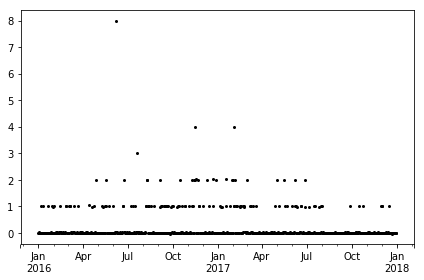

In [139]:
jittered.plot(style='ko', ms=2)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


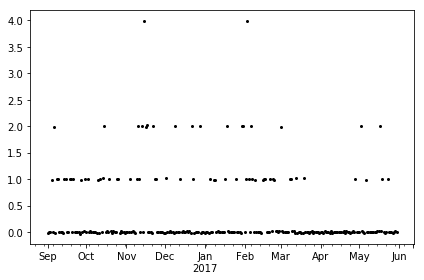

In [140]:
jittered['2016-09-01':'2017-05-30'].plot(style='ko', ms=2)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


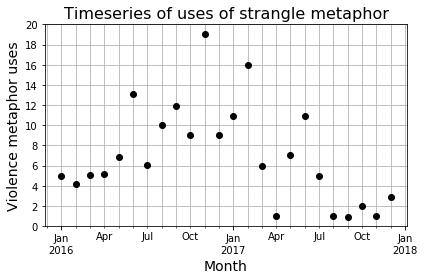

In [236]:
# Start on a Monday for taking weekly aggregates
# j = jittered['2016-01-04':]
j = jittered

jr = j.resample('1M').sum()
jr.plot(style='ko')
plt.ylim(0, 20)

plt.ylabel('Violence metaphor uses', size=14)
plt.xlabel('Month', size=14)
plt.yticks(np.arange(0, 21, 2))
plt.gca().grid(axis='x', which='minor')
plt.gca().grid(axis='y', which='major')
plt.title('Timeseries of uses of strangle metaphor', size=16)
plt.savefig('/Users/mt/Desktop/timeseries.pdf')

## Export transcripts of instances

For close reading, we will export discourse around the violence signal, originally identified through a wildcard search `strangl*`. Then, we'll search the internet archive in a small time window around the known air date, and find only the specific phrase around the strangle-based metaphor.

These will be saved to .docx in a format I will mostly guess at for Leigh to read into nVivo.

In [188]:
from docx import Document

document = Document()

document.add_heading('FBC - Mornings with Maria Bartiromo - 8/1/17', 1)

p = document.add_paragraph('this is where the transcript will go...')
p.add_run('the word "strangling" and words around it').bold = True
p.add_run(' will be ')

p.add_run('in bold').bold = True

document.add_heading('CSPAN - CAPITOL HILL - 4/13/16', 1)

p = document.add_paragraph('this is where the transcript will go...')
p.add_run('the word "strangling" and words around it').bold = True
p.add_run(' will be ')

p.add_run('in bold').bold = True

document.save('/Users/mt/Desktop/demo.docx')

OK, got that little prototype done. Going to write a script to build instance summaries. This summary will be like above with channel, 
show name, and date in the second-level header. They will be ordered by date, with the first-level header being the Month Year for ease of navigation. 

The script will iterate over dates and instances on each date, plugging in an instance and the instance context. That instance context needs to be fetched from the TVNA by using the exact context around strangling and limiting the date to the air date of the instance, -/+ one day just to be safe. We'll keep track of any that can't be found, or where there's more than one search result. 

In [189]:
df.head()

,start_localtime,start_time,stop_time,runtime_seconds,network,program_name,iatv_id,facet_word,conceptual_metaphor,spoken_by,subjects,objects,active_passive,text,tense,repeat,repeat_index
0,2016-07-12 23:00:00,None,None,None,CSPAN,US House of Representatives Special Orders,CSPAN_20160712_230000_US_House_of_Representati...,epa-reg-strangle,,Evan Jenkins (R-West Virginia; 3rd District),methane regulations,domestic energy portfolio,,<b></b> <em>environmental</em> <em>protection<...,,False,None
1,2016-09-21 20:00:00,None,None,None,CSPAN,U.S. House of Representatives Legislative Busi...,CSPAN_20160921_200000_U.S._House_of_Representa...,epa-reg-strangle,,"Bob Goodlatte (R-Virginia), Tom Marino (R-Penn...","washington regulators, ozone standards","economic recovery, economic opportunities",,<b>michigan</b> <b>v.</b> <em>e.p.a</em>. <b>...,,False,None
2,2017-02-02 15:59:00,None,None,None,CSPAN2,U.S. Senate Advances HHS Secretary Nomination,CSPAN2_20170202_155900_U.S._Senate_Advances_HH...,epa-reg-strangle,,John Cornyn (R-Texas; Senate),"extreme buffer rule, regulatory overreach","growth of our economy, jobs",,"in <b>mind,</b> <b>the</b> <em>environmental<...",,False,None
3,2017-01-05 18:59:00,None,None,None,CSPAN,U.S. House Legislative Business,CSPAN_20170105_185900_U.S._House_Legislative_B...,epa-reg-strangle,,Tom Marino (R-Pennsylvania; 10th District),"regulation, federal regulations, Obama's regul...","economy, economy, job creation",,. the gentleman from virginia is recognized. m...,,False,None
4,2017-03-01 21:00:00,None,None,None,CSPAN,U.S. House Meets for Legislative Business,CSPAN_20170301_210000_U.S._House_Meets_for_Leg...,epa-reg-strangle,,David Young (R-Iowa; 3rd District),red tape,economy and jobs engine,,<b>red</b> <b>tape</b> <em>strangling</em> <b...,,False,None


In [201]:
# Searching through transcripts for strangl*
tr_path = 'transcripts/FOXNEWSW_20170628_100000_FOX__Friends.txt'

s = '''
hello why strangling strangler regulation strangles the economy and freedom
'''
import re
res = re.findall('strangl', s)
s[11:18]

'strangl'

In [204]:
for m in re.finditer(r'strangl', s):
    print('%02d-%02d: %s' % (m.start(), m.end(), m.group(0)))

11-18: strangl
22-29: strangl
43-50: strangl


In [208]:
tr = open(tr_path, 'r').read()

out = tr[m.start() - 1000:m.end() + 1000]

fiter = re.finditer(r'STRANGL', tr)
for m in re.finditer(r'STRANGL', tr):
    print(out)

ND WORK FOR DIFFERENT  THINGS THAT WE SEE OUT IN THE  PUBLIC REALM. I DO -- SOME OF HIS TWEETING  COULD BE ADJUSTED A LITTLE  BIT. I THINK IT\'S A GOOD METHOD  PLATFORM, BUT I DO THINK THEY  NEED TO LOOK AT IT A LITTLE  STRONGER AND MAKE SURE THAT HE  KEEPS TO THE POINT AND SERVES  HIM IN THE APPROPRIATE WAY. \n\n TRUE. THANK YOU VERY MUCH. LET\'S GO OVER TO LEE. WHAT\'S INTERESTING ABOUT LEE  IS LEE IS ONE OF THOSE VOTERS  WE WERE TALKING ABOUT BEFORE. LEE ACTUALLY VOTED FOR BILL  CLINTON BUT NOW VOTED FOR  TRUMP. WHY? \n\n WELL, PRIMARILY BECAUSE  TRUMP IS NOT A POLITICIAN. I\'M SO TIRED OF CAREER  POLITICIANS RUNNING THIS  COUNTRY AND RUINING IT. SO I CHOSE TO GO WITH WHO  DID. \n\n AS A GOAT RANCHER, THAT IS  YOUR JOB MAIN ISSUE THAT  YOU\'RE FIRED UP ABOUT IS THE  EPA AND WHAT YOU VIEW IS NEEDLESS REGULATIONS. TALK ABOUT THAT. \n\n NOT ONLY THE EPA BUT ALL  GOVERNMENT AGENCIES THAT ARE OVERSTEPPING THEIR BOUNDS. THE EPA HAS PUT INTO POSITIONS  SOME RULES AND REGULATIONS  THAT ARE 

In [234]:
from util import format_snippet

print(format_snippet(tr))

# 1

nd work for different  things that we see out in the  public realm. i do -- some of his tweeting  could be adjusted a little  bit. i think it's a good method  platform, but i do think they  need to look at it a little  stronger and make sure that he  keeps to the point and serves  him in the appropriate way. 

 true. thank you very much. let's go over to lee. what's interesting about lee  is lee is one of those voters  we were talking about before. lee actually voted for bill  clinton but now voted for  trump. why? 

 well, primarily because  trump is not a politician. i'm so tired of career  politicians running this  country and ruining it. so i chose to go with who  did. 

 as a goat rancher, that is  your job main issue that  you're fired up about is the  epa and what you view is needless regulations. talk about that. 

 not only the epa but all  government agencies that are overstepping their bounds. the EPA HAS PUT INTO POSITIONS  SOME RULES AND REGULATIONS  THAT ARE STRANGLE

So much for creating snippets file. Wrapped up what I figured out in `util.py:make_docx`.

# Results

Now to put together results that address the hypotheses advanced here. 